# Classification of Heart Disease Using K-Nearest Neighbor

## Introduction
- Literature Review: background info on heart disease
- Research Questions
- About the Dataset used

Many people die of cardiovascular diseases without knowing they have a problem with their heart. Unexpected deaths as such can be prevented with early diagnoses of cardiovascular issues and proper medication. How can the presence of heart diseases be detected in patients? The heart disease data set we are using contains 14 attributes collected from Cleveland and is still used my ML researchers to this day.  

## Preliminary Exploratory Data Analysis
#### 1. Download and Read the dataset from the web (use URL)

In [14]:
# Call packages that will be used.
library(tidyverse)
library(tidymodels)
library(GGally)

In [15]:
# Set the value of seed to ensure reproducibility
set.seed(200)

In [16]:
# To download the dataset from the web
url <- 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
download.file(url,destfile='HeartDisease_Cleveland.csv')

In [17]:
# Read the 'HeartDisease_Cleveland.csv' file into a dataframe
heart_cleve <- read_csv('HeartDisease_Cleveland.csv',col_names=FALSE)
head(heart_cleve)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)



X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


#### 2. Clean and Wrangle data into tidy format

In [18]:
# Rename the column names and format the column types
heart_cleve <- rename(heart_cleve, age = X1,
               sex = X2,
               cp = X3,
               trestbps = X4,
               chol = X5,
               fbs = X6,
               restecg = X7,
               thalach = X8,
               exang = X9,
               oldpeak = X10,
               slope = X11,
               ca = X12,
               thal = X13,
               num = X14) %>% 
            mutate(num = as_factor(num),ca = as.numeric(ca),thal = as.numeric(thal))
head(heart_cleve)

Warning message:
“Problem with `mutate()` input `ca`.
ℹ NAs introduced by coercion
ℹ Input `ca` is `as.numeric(ca)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `thal`.
ℹ NAs introduced by coercion
ℹ Input `thal` is `as.numeric(thal)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [13]:
# wrangle the `num` column where 0 indicates no heart disease and 1 indicates diagnosis of heart disease.

heart_cleve$num[heart_cleve$num==2] <- 1
heart_cleve$num[heart_cleve$num==3] <- 1
heart_cleve$num[heart_cleve$num==4] <- 1
head(heart_cleve)

# Source: https://www.geeksforgeeks.org/how-to-replace-specific-values-in-column-in-r-dataframe/

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
62,0,4,140,268,0,2,160,0,3.6,3,2,3,1
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
63,1,4,130,254,0,2,147,0,1.4,2,1,7,1


#### 4. Summary statistics about the training data

In [53]:
# Split the dataset into training and test sets

heart_split <- initial_split(heart_cleve,prop=0.75,strata=num)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

In [54]:
# Summary Statistics about the training data

# number of observations in each class
heart_sum_class <- heart_train %>% 
                group_by(num) %>%
                summarise(n=n())
heart_sum_class

`summarise()` ungrouping output (override with `.groups` argument)



num,n
<fct>,<int>
0,123
1,40
2,28
3,26
4,12


In [67]:
# summary statistics of predictor variables used in analysis
options(digits=2)
heart_percentile <- heart_train %>%
                    select(-num) %>%
                    map_df(quantile,na.rm=TRUE) 

heart_1stQ <- heart_percentile %>%
                select('25%') %>%
                t()%>%
                as.vector()

heart_3rdQ <- heart_percentile %>%
                select('75%') %>%
                t() %>%
                as.vector()

heart_mean <- heart_train%>% 
                    select(-num) %>%
                    map_df(mean,na.rm = TRUE)

heart_min <- heart_train %>%
                    select(-num) %>%
                    map_df(min,na.rm=TRUE)

heart_max <- heart_train %>%
                    select(-num) %>%
                    map_df(max,na.rm=TRUE)

heart_median <- heart_train %>%
                    select(-num) %>%
                    map_df(median,na.rm=TRUE)

heart_range <- heart_max - heart_min

heart_missing <- colSums(is.na(heart_train%>%select(-num)))
# Source: https://stackoverflow.com/questions/26273663/r-how-to-total-the-number-of-na-in-each-col-of-data-frame

heart_sum_pred <- rbind(heart_min, heart_1stQ, heart_median,heart_mean, heart_3rdQ, heart_max, heart_range, heart_missing) %>%
                    mutate(Statistics=c('Min','First Quartile','Median','Mean','Third Quartile','Max','Range','# of Missing Value'),.before=age)
heart_sum_pred

Statistics,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Min,34,0.00,1.0,94,149,0.00,0,71,0.00,0.0,1.0,0.00,0.00
First Quartile,49,0.00,3.0,120,212,0.00,0,132,0.00,0.0,1.0,0.00,0.00
Median,56,1.00,3.0,130,242,0.00,2,152,0.00,0.8,2.0,0.00,0.00
Mean,55,0.67,3.2,132,248,0.14,1,149,0.34,1.0,1.6,0.66,0.66
Third Quartile,61,1.00,4.0,140,276,0.00,2,165,1.00,1.6,2.0,1.00,1.00
Max,77,1.00,4.0,200,564,1.00,2,195,1.00,6.2,3.0,3.00,3.00
Range,43,1.00,3.0,106,415,1.00,2,124,1.00,6.2,2.0,3.00,3.00
# of Missing Value,0,0.00,0.0,0,0,0.00,0,0,0.00,0.0,0.0,3.00,3.00


In [68]:
summary(heart_train)

      age          sex             cp         trestbps        chol    
 Min.   :34   Min.   :0.00   Min.   :1.0   Min.   : 94   Min.   :149  
 1st Qu.:49   1st Qu.:0.00   1st Qu.:3.0   1st Qu.:120   1st Qu.:212  
 Median :56   Median :1.00   Median :3.0   Median :130   Median :242  
 Mean   :55   Mean   :0.67   Mean   :3.2   Mean   :132   Mean   :248  
 3rd Qu.:61   3rd Qu.:1.00   3rd Qu.:4.0   3rd Qu.:140   3rd Qu.:276  
 Max.   :77   Max.   :1.00   Max.   :4.0   Max.   :200   Max.   :564  
                                                                      
      fbs          restecg        thalach        exang         oldpeak   
 Min.   :0.00   Min.   :0.00   Min.   : 71   Min.   :0.00   Min.   :0.0  
 1st Qu.:0.00   1st Qu.:0.00   1st Qu.:132   1st Qu.:0.00   1st Qu.:0.0  
 Median :0.00   Median :2.00   Median :152   Median :0.00   Median :0.8  
 Mean   :0.14   Mean   :1.02   Mean   :149   Mean   :0.34   Mean   :1.0  
 3rd Qu.:0.00   3rd Qu.:2.00   3rd Qu.:165   3rd Qu.:1.00   3r

#### 4. Visualize the training data
    - compare the distributions of each of the predictor variables used in the analysis

Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Re

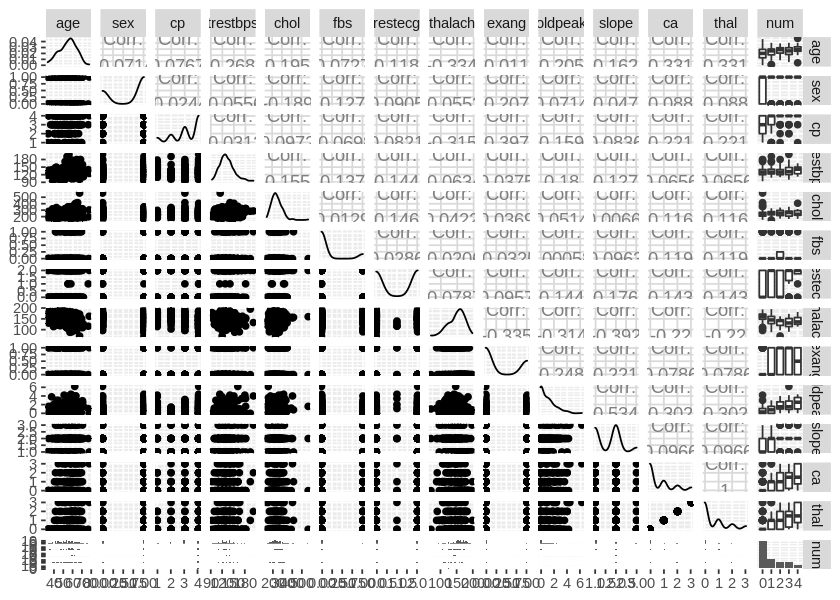

In [77]:
ggpairs(heart_train)

## Methods
- Explain how to conduct the data analysis
- Explain which variables you will use
- Describe at least one way you will visualize the results

## Expected Outcomes and Significance
- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?